In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error


In [3]:
# Load the dataset
df_sola_train = pd.read_csv('Plant_Prediction_Data_Grouped.csv')
df_sola_train.head()


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,0.0,2222.724459,6.449816e+08,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,0.0,0.0,1290.954545,6.449816e+08,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,0.0,0.0,1290.954545,6.449816e+08,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,0.0,0.0,1290.954545,6.449816e+08,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,0.0,0.0,1205.272727,6.449816e+08,26.596148,25.088210,0.0


In [4]:
df_sola_train['DATE_TIME'] = pd.to_datetime(df_sola_train['DATE_TIME'])
df_sola_train['YEAR'] = df_sola_train['DATE_TIME'].dt.year
df_sola_train['MONTH'] = df_sola_train['DATE_TIME'].dt.month
df_sola_train['DAY'] = df_sola_train['DATE_TIME'].dt.day
df_sola_train['HOUR'] = df_sola_train['DATE_TIME'].dt.hour
df_sola_train['MINUTE'] = df_sola_train['DATE_TIME'].dt.minute

# Drop the original DATE_TIME column
df_sola_train.drop(columns=['DATE_TIME'], inplace=True)
# Check for missing values
missing_values = df_sola_train.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
YEAR                   0
MONTH                  0
DAY                    0
HOUR                   0
MINUTE                 0
dtype: int64


In [5]:
df_sola_train.drop(columns=['TOTAL_YIELD'], inplace=True)
df_sola_train.head()

,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,YEAR,MONTH,DAY,HOUR,MINUTE
0,0.0,0.0,2222.724459,27.004764,25.060789,0.0,2020,5,15,0,0
1,0.0,0.0,1290.954545,26.880811,24.421869,0.0,2020,5,15,0,15
2,0.0,0.0,1290.954545,26.682055,24.427290,0.0,2020,5,15,0,30
3,0.0,0.0,1290.954545,26.500589,24.420678,0.0,2020,5,15,0,45
4,0.0,0.0,1205.272727,26.596148,25.088210,0.0,2020,5,15,1,0


In [6]:
x = df_sola_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = df_sola_train['AC_POWER']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
# Create a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred_liner = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 10002.17007604515
R^2 Score: 0.9165777751341508


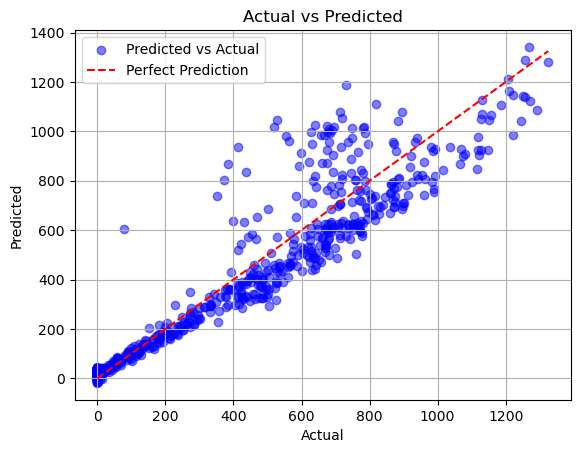

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_liner, color='blue', label='Predicted vs Actual',alpha=0.5)  # จุดสีน้ำเงิน
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')  # เส้นทแยงมุมสีแดง
plt.xlabel("Actual", color='black')
plt.ylabel("Predicted", color='black')
plt.title("Actual vs Predicted", color='black')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
model_Rf = RandomForestRegressor(n_estimators=20000, random_state=42)
model_Rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20000, random_state=42)

In [11]:
y_pred_rf = model_Rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R^2 Score (Random Forest): {r2_rf}')


Mean Squared Error (Random Forest): 5432.654904024159
R^2 Score (Random Forest): 0.9546894168389048


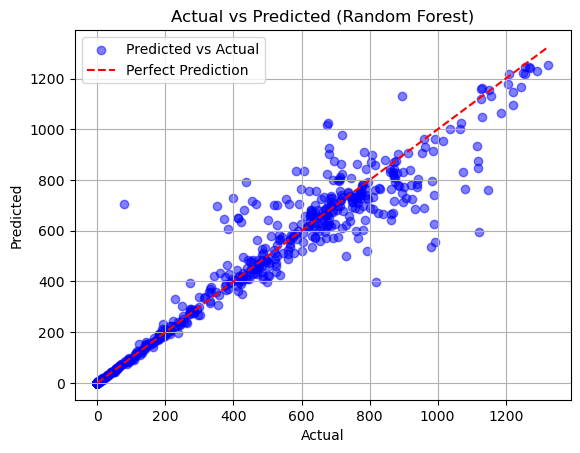

In [12]:
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicted vs Actual',alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual", color='black')
plt.ylabel("Predicted", color='black')
plt.title("Actual vs Predicted (Random Forest)", color='black')
plt.legend()
plt.grid(True)
plt.show()

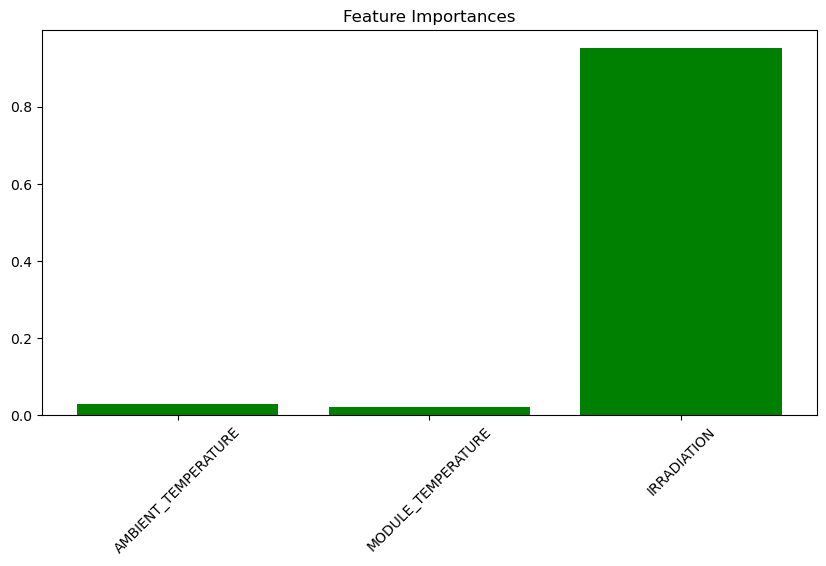

In [13]:
importances = model_Rf.feature_importances_
features = x.columns

plt.figure(figsize=(10, 5))
plt.bar(features, importances, color='green')
plt.title("Feature Importances")
plt.xticks(rotation=45)
plt.show()

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_dist = {
    'n_estimators': [10000, 20000, 30000],
    'max_depth': [None, 20, 25, 30],
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [53]:
rf = RandomForestRegressor(random_state=42)

# ใช้ RandomizedSearch
random_search = RandomizedSearchCV(estimator=model_Rf,
                                   param_distributions=param_dist,
                                   n_iter=10,  
                                   cv=3,       
                                   scoring='neg_mean_squared_error',
                                   random_state=42,
                                   n_jobs=-1)

random_search.fit(x_train, y_train)

best_model = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn

Best Parameters: {'n_estimators': 10000, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}


In [54]:
y_pred_best = best_model.predict(x_test)

In [55]:
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best)

print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 5030.557279326142
RMSE: 70.92642158833435
R-squared: 0.9580430769157233


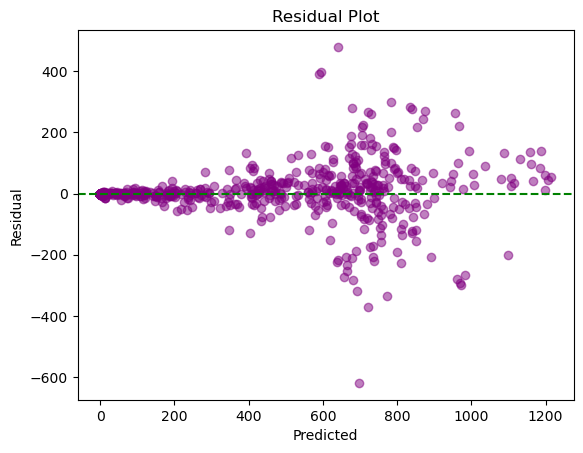

In [56]:
residuals = y_test - y_pred_best

plt.scatter(y_pred_best, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

In [57]:
train_pred = best_model.predict(x_train)

r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, y_pred_best)

print("Train R²:", r2_train)
print("Test R²:", r2_test)


Train R²: 0.9826007597364257
Test R²: 0.9580430769157233


In [34]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 7.3/150.0 MB 41.4 MB/s eta 0:00:04
   - -------------------------------------- 7.3/150.0 MB 41.4 MB/s eta 0:00:04
   --- ------------------------------------ 11.5/150.0 MB 20.1 MB/s eta 0:00:07
   --- ------------------------------------ 11.5/150.0 MB 20.1 MB/s eta 0:00:07
   ---- ----------------------------------- 16.0/150.0 MB 15.3 MB/s eta 0:00:09
   ---- ----------------------------------- 17.3/150.0 MB 13.6 MB/s eta 0:00:10
   ---- ----------------------------------- 18.6/150.0 MB 12.8 MB/s eta 0:00:11
   ----- ---------------------------------- 19.9/150.0 MB 11.9 MB/s eta 0:00:11
   ----- ---------------------------------- 21.2/150.0 MB 11.2 MB/s eta 0:00:12
   ------ --------------------------------- 22.5/150.0 MB 10.6 MB/s eta 0:00:12
   ------ --------------------------------- 23.6/150.0 MB 10.2 MB/s eta 0:00:13
   ------ --------------------------------- 25.2/1

In [37]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=10000, random_state=42)

param_grid = {
    'n_estimators': [5000, 10000, 20000],
    'max_depth': [2, 5, 10],
    'learning_rate': [0.005, 0.15, 0.25]
}

search = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, scoring='r2', cv=3)
search.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=10000, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   param_distributions={'learning_rate': [0.005, 0.15, 0.25],
                                        'max_depth': [2, 5, 10],
                                        'n_estimators': [5000, 10000, 20000]},
                   scoring='r2')

In [39]:
best_xgb_model = search.best_estimator_
print("Best Parameters for XGBoost:", search.best_params_)
y_pred_xgb = best_xgb_model.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'R^2 Score (XGBoost): {r2_xgb}')

Best Parameters for XGBoost: {'n_estimators': 5000, 'max_depth': 2, 'learning_rate': 0.005}
Mean Squared Error (XGBoost): 4807.612021158278
R^2 Score (XGBoost): 0.9599025323457202


In [60]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Random Forest Fine-tuned', 'XGBoost fine-tuned'],
    
    'R² Score': [
        r2_score(y_test, y_pred_liner),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_best),
        r2_score(y_test, y_pred_xgb)
        
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_liner)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_best)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    ]
})

print(results)

                      Model  R² Score        RMSE
0         Linear Regression  0.916578  100.010850
1             Random Forest  0.954689   73.706546
2  Random Forest Fine-tuned  0.958043   70.926422
3        XGBoost fine-tuned  0.959903   69.336946


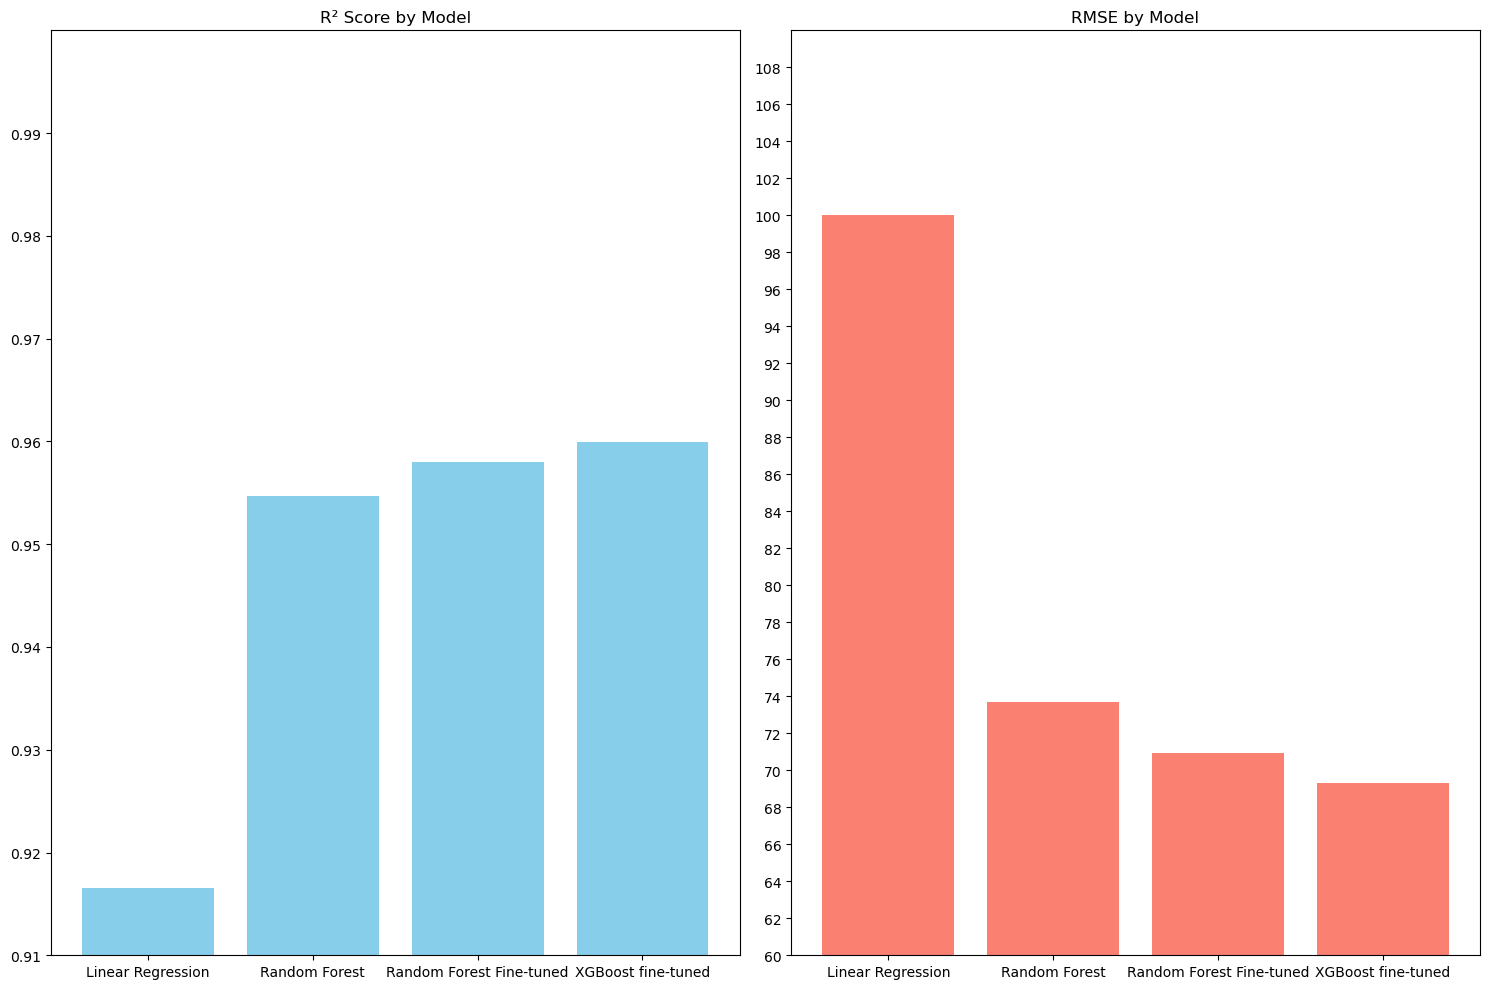

In [61]:
plt.figure(figsize=(15, 10))

# R²
plt.subplot(1, 2, 1)
plt.bar(results['Model'], results['R² Score'], color='skyblue')
plt.title('R² Score by Model')
plt.yticks(np.arange(0.9, 1, 0.01))
plt.ylim(0.91, 1)
# Add text annotations for R² scores
# RMSE
plt.subplot(1, 2, 2)
plt.bar(results['Model'], results['RMSE'], color='salmon')
plt.title('RMSE by Model')
plt.yticks(np.arange(60, 110, 2))
plt.ylim(60, 110)

plt.tight_layout()
plt.show()